In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)

In [2]:
df= pd.read_csv("../Data/MarineMicroplastics.csv")
df.head(2)

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Accession Number,Accession Link,GlobalID,CreationDate,Creator,EditDate,Editor,Long Reference,x,y
0,40055,4/3/2011 12:00:00 AM,-30.2413,-97.0948,Pacific Ocean,NaN,NaN,0.390376,pieces/m3,0.005-1,...,275968,https://www.ncei.noaa.gov/access/metadata/land...,4078602b-702b-4514-b625-4b08fb50d16c,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Eriksen, M., L.C.M. Lebreton, H.S. Carson, M. ...",-1.080854e+07,-3.534605e+06
1,39794,11/27/2010 12:00:00 AM,-33.5729,-13.7057,Atlantic Ocean,NaN,NaN,0.976803,pieces/m3,0.005-1,...,275968,https://www.ncei.noaa.gov/access/metadata/land...,fff505a7-d6da-435d-9b6e-8263bf448e78,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Eriksen, M., L.C.M. Lebreton, H.S. Carson, M. ...",-1.525712e+06,-3.971596e+06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13942 entries, 0 to 13941
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FID               13942 non-null  int64  
 1   Date              13942 non-null  object 
 2   Latitude          13942 non-null  float64
 3   Longitude         13942 non-null  float64
 4   Oceans            13942 non-null  object 
 5   Regions           3890 non-null   object 
 6   SubRegions        1010 non-null   object 
 7   Measurement       13942 non-null  float64
 8   Unit              13942 non-null  object 
 9   Density Range     13942 non-null  object 
 10  Density Class     13942 non-null  object 
 11  Sampling Method   13942 non-null  object 
 12  Short Reference   13942 non-null  object 
 13  DOI               13942 non-null  object 
 14  Organization      13942 non-null  object 
 15  Keywords          13855 non-null  object 
 16  Accession Number  13942 non-null  int64 

In [4]:
df.describe()

,FID,Latitude,Longitude,Measurement,Accession Number,x,y
count,13942.000000,13942.000000,13942.000000,13942.000000,13942.000000,1.394200e+04,1.394200e+04
mean,35652.500000,22.860456,-68.851821,19.875033,226976.439033,-7.664550e+06,2.739463e+06
std,4024.853062,19.959507,70.062754,530.429209,27297.838359,7.799350e+06,2.573204e+06
min,28682.000000,-71.699040,-179.994200,0.000000,170967.000000,-2.003686e+07,-1.164563e+07
25%,32167.250000,16.620000,-130.170875,0.000000,211007.000000,-1.449056e+07,1.876635e+06
50%,35652.500000,25.500000,-70.280000,0.007200,211008.000000,-7.823534e+06,2.937284e+06
75%,39137.750000,35.100000,-58.735000,0.069116,253448.000000,-6.538350e+06,4.177479e+06
max,42623.000000,81.090000,179.854333,57665.000000,276482.000000,2.002129e+07,1.627817e+07


In [5]:
df.isnull().sum()

FID                     0
Date                    0
Latitude                0
Longitude               0
Oceans                  0
Regions             10052
SubRegions          12932
Measurement             0
Unit                    0
Density Range           0
Density Class           0
Sampling Method         0
Short Reference         0
DOI                     0
Organization            0
Keywords               87
Accession Number        0
Accession Link          0
GlobalID                0
CreationDate            0
Creator                 0
EditDate                0
Editor                  0
Long Reference          0
x                       0
y                       0
dtype: int64

In [6]:
df["Date"]= pd.to_datetime(df["Date"])
df.dtypes

FID                          int64
Date                datetime64[ns]
Latitude                   float64
Longitude                  float64
Oceans                      object
Regions                     object
SubRegions                  object
Measurement                float64
Unit                        object
Density Range               object
Density Class               object
Sampling Method             object
Short Reference             object
DOI                         object
Organization                object
Keywords                    object
Accession Number             int64
Accession Link              object
GlobalID                    object
CreationDate                object
Creator                     object
EditDate                    object
Editor                      object
Long Reference              object
x                          float64
y                          float64
dtype: object

In [93]:
pd.DataFrame(df[['Oceans','Regions']].groupby('Oceans').value_counts())

0
Oceans         Regions                                                 
Arctic Ocean   Norwegian Sea                                         26
               Northwestern Passages                                 20
               Laptev Sea                                            18
               Greenland Sea                                         18
               Kara Sea                                              16
               Davis Strait                                          12
               Baffin Bay                                             7
               Barents Sea                                            6
               East Siberian Sea                                      6
               White Sea                                              3
               Chukchi Sea                                            2
               Beaufort Sea                                           2
               Hudson Strait                                          1
Atlantic Ocean Caribbean Sea                                       1765
               Mediterranean Sea                                    987
               Gulf of Mexico                                       102
               Stellwagen Bank National Marine Sanctuary             52
               Celtic Sea                                            26
               Gulf of St. Lawrence                                  25
               North Sea                                             18
               New York Bight                                        17
               Coastal Waters of Florida                             15
               Baltic Sea                                            14
               English Channel                                       11
               Black Sea                                             10
               Bay of Biscay                                         10
               Florida Keys National Marine Sanctuary                 9
               Kattegat                                               5
               Skagerrak Strait                                       4
               Labrador Sea                                           2
               Rio de La Plata                                        2
               Inner Seas off the West Coast of Scotland              2
               Gulf of Bothnia                                        1
               Rio de la Plata                                        1
Indian Ocean   Great Australian Bight                                53
               Bay of Bengal                                         34
               Mozambique Channel                                    21
               Arafura Sea                                           18
               Andaman Sea                                           15
               Timor Sea                                             11
               Red Sea                                                1
Pacific Ocean  Tasman Sea                                           102
               South China Sea                                      101
               Coral Sea                                             84
               Gulf of Alaska                                        51
               Coastal Waters of Southeast Alaska and British ...    46
               Philippine Sea                                        31
               Gulf of California                                    26
               Monterey Bay National Marine Sanctuary                11
               East China Sea                                         7
               Bering Sea                                             7
               Solomon Sea                                            6
               Papahanaumokuakea Marine National Monument             5
               Bass Strait                                            5
               Inland Sea             

In [8]:
pd.DataFrame(df[['Regions','SubRegions']].groupby('Regions').value_counts())

0
Regions                   SubRegions                                 
Baltic Sea                Gulf of Riga                              2
                          Gulf of Bothnia                           1
Coastal Waters of Florida Florida Keys National Marine Sanctuary    6
Gulf of Mexico            Coastal Waters of Florida                12
                          Florida Keys National Marine Sanctuary    1
Mediterranean Sea         Western Basin                           356
                          Eastern Basin                           169
                          Balearic Sea                            144
                          Tyrrhenian Sea                           96
                          Aegean Sea                               58
                          Ionian Sea                               50
                          Adriatic Sea                             49
                          Ligurian Sea                             39
                          Alboran Sea                              23
                          Strait of Gibraltar                       3
Red Sea                   Gulf of Suez                              1

In [108]:
# mean and median measurements plus the value counts grouped by oceans
df.groupby("Oceans")["Measurement"].agg(["mean", "median", "count"]).sort_values(by= ["count"], ascending= False)

,mean,median,count
Oceans,,,
Atlantic Ocean,14.242906,0.007852,8663
Pacific Ocean,32.087975,0.006000,4784
Indian Ocean,0.603416,0.011117,325
Arctic Ocean,0.035359,0.008999,143
Southern Ocean,0.050813,0.008000,27


In [107]:
# mean and median measurements plus the value counts grouped by regions
df.groupby("Regions")["Measurement"].agg(["mean", "median", "count"]).sort_values(by= ["count"], ascending= False)

,mean,median,count
Regions,,,
Caribbean Sea,0.005581,0.000000,1765
Mediterranean Sea,2.274027,0.613333,987
Tasman Sea,1.421293,0.018436,102
Gulf of Mexico,0.010097,0.000000,102
South China Sea,1469.583248,796.000000,101
Coral Sea,2.751419,0.044945,84
Great Australian Bight,0.014931,0.003106,53
Stellwagen Bank National Marine Sanctuary,0.007149,0.000000,52
Gulf of Alaska,0.009686,0.006000,51


In [109]:
# mean and median measurements plus the value counts grouped by Density Class
df.groupby("Density Class")["Measurement"].agg(["mean", "median", "count"]).sort_values(by= ["count"], ascending= False)

,mean,median,count
Density Class,,,
Medium,0.131531,0.033000,6257
Very Low,0.000000,0.000000,4420
Low,0.002853,0.002400,1931
High,3.143628,2.413144,1032
Very High,904.056233,58.500000,302


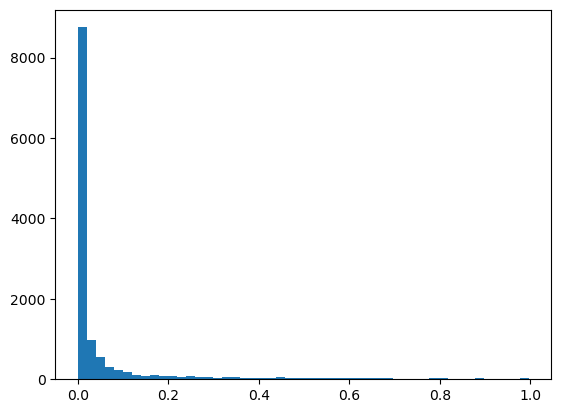

In [47]:
# there's a large concentration of samples with microplastic measurements between 0 and 1
plt.hist(df["Measurement"][df["Measurement"]< 1], bins= 50);

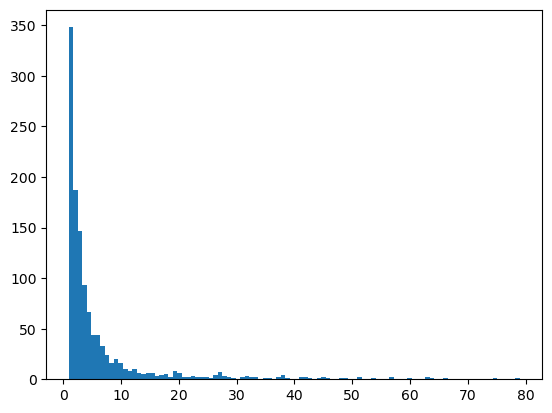

In [74]:
# histogram of values between 1 and 80
between1_and_1000= df[(df["Measurement"]>1) & (df["Measurement"]<80)]
plt.hist(between1_and_1000["Measurement"], bins= 100);

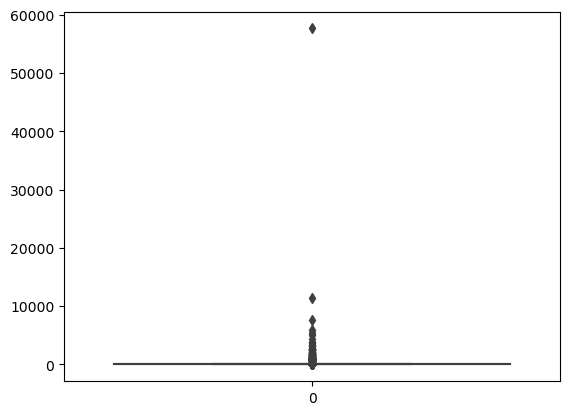

In [110]:
sns.boxplot(df["Measurement"]);

# there are a lot of outliers 